In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gzip
from multiprocessing import Pool
import os
import pandas as pd 
import re
import math

In [2]:
import os

In [3]:
vcf_file = 'arp-v2.1-mc-chm13.vcf'


In [4]:
import pickle

In [5]:
def extract_info(info_str, key):
    for field in info_str.split(';'):
        if field.startswith(key + '='):
            return field[len(key)+1:]
    return None

In [6]:
def allele_lengths(ref, alt):
    alts = alt.split(',')
    return [len(a) for a in alts]

In [8]:
interesting_alleles = []
all_lengths = []
with open(vcf_file, 'r') as vcf:
    for line in vcf:
        if not line.startswith('#'):  # Exclude header lines
            columns = line.strip().split('\t')
            ref = columns[3]
            alt = columns[4]
            
            lengths = allele_lengths(ref, alt)
            
            if ((len(lengths) >= 5 and any((l-len(ref)) > 10000 for l in lengths)) ):
                all_lengths.extend(lengths)
                interesting_alleles.append(line.strip())


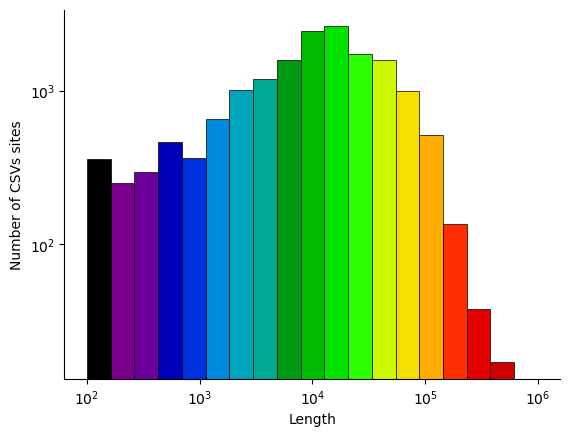

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

def variant_lengths_from_vcf_line(vcf_lines):
    lengths = []

    for line in vcf_lines:
        if line.startswith("#"):  # skip header lines
            continue

        fields = line.split("\t")
        ref = fields[3]
        alts = fields[4].split(',')

        for alt in alts:
            length_difference = len(alt) - len(ref)
            if abs(length_difference) > 50:  # considering only variants larger than 50kb
                lengths.append(abs(length_difference))

    return lengths

def plot_distribution(lengths, min_length, max_length, num_bins):
    # Create log-spaced bins
    bins = np.logspace(np.log10(min_length), np.log10(max_length), num_bins)

    # Plot the histogram with log scale
    hist, edges = np.histogram(lengths, bins=bins)
    widths = np.diff(edges)
    
    colors = cm.nipy_spectral(np.linspace(0, 1, len(hist)))
    
    plt.bar(edges[:-1], hist, width=widths, align='edge', edgecolor="k", color=colors, log=True,  linewidth=0.5)
    plt.xscale('log')
    plt.xlabel('Length')
    plt.ylabel('Number of CSVs sites')
    plt.tick_params(axis='both', which='minor', bottom=False, top=False, left=False, right=False)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.savefig('csv_dist.png', dpi=600)
    plt.savefig('csv_dist.tiff', dpi=600)
    plt.savefig('csv_dist.svg', dpi=600)
    plt.show()
    
    
    return hist, edges

# Sample VCF lines
vcf_lines = interesting_alleles

lengths = variant_lengths_from_vcf_line(vcf_lines)

# Define parameters for the histogram
min_length = 100  # smallest possible variant length you expect
max_length = 1000000  # or whatever maximum length you expect
num_bins = 20  # or however many bins you want

hist, edges = plot_distribution(lengths, min_length, max_length, num_bins)


In [46]:
with open('hist_values.csv', 'w') as f:
    for bin, value in zip(edges[:-1], hist):
        f.write(f'{bin},{value}\n')
    

In [40]:
def get_df(sites):
    data = []
    for site in sites:
        data.append((site.split()[0], int(site.split()[1])))
     
    return pd.DataFrame(data, columns=['chrom', 'pos'])

In [41]:
def get_lens(sites):
    lengths = []
    
    for site in sites:
        

SyntaxError: incomplete input (628172086.py, line 5)

In [9]:
lengths_l1k = [l for l in all_lengths if l > 1000]

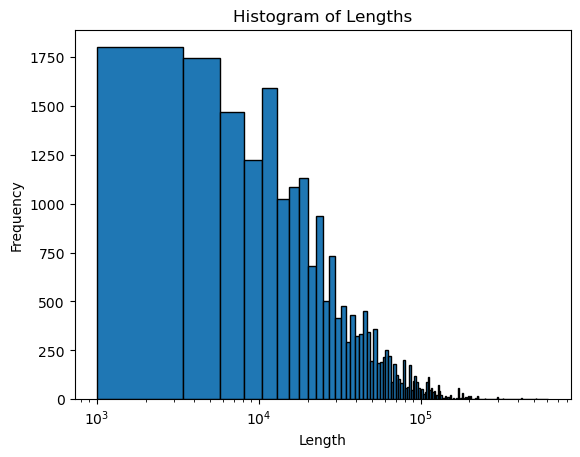

In [12]:
import matplotlib.pyplot as plt
plt.hist(lengths_l1k, bins='auto', edgecolor='black')  # 'auto' can be replaced with an integer if you want to specify the number of bins

# Add title and labels
plt.title('Histogram of Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.xscale('log')

# Display the histogram
plt.show()

In [49]:
import plotly.graph_objects as go

# Sample list of lengths


# Create the histogram
fig = go.Figure(data=[go.Histogram(x=lengths_l1k)])

# Update layout for a cleaner look
fig.update_layout(title='Histogram of Lengths',
                  xaxis_title='Length',
                  yaxis_title='Frequency')

# Display the histogram
fig.show()

In [53]:
sum(all_lengths)/len(all_lengths)

29893.349627913194

In [ ]:
e='''Barcode 1 - Wildtype 1

Barcode 2 - Wildtype 2

Barcode 3 - Wildtype 3

Barcode 4 - Mutant 1

Barcode 5 - Mutant 2

Barcode 6 - Mutant 3

Barcode 7 - OE 1

Barcode 8 - OE 2

Barcode 9 - OE 3'''.split('\n')